In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'D:\\ml\\DQ\\0904.xlsx'  
data = pd.read_excel(file_path)

# Splitting the data into features and target variable
X = data.drop('death', axis=1)
y = data['death']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
log_reg_probs = log_reg.predict_proba(X_test)[:, 1]

# Initialize and train the random forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)[:, 1]

# Initialize and calibrate the SVM model
svm = SVC(probability=False, random_state=42)
calibrated_svm = CalibratedClassifierCV(svm, method='sigmoid', cv=5)
calibrated_svm.fit(X_train, y_train)
svm_probs = calibrated_svm.predict_proba(X_test)[:, 1]

# Initialize and train the gradient boosting model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
gb_probs = gb.predict_proba(X_test)[:, 1]

# Calculating the ROC curve and AUC for each model
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg_probs)
auc_log_reg = roc_auc_score(y_test, log_reg_probs)

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
auc_rf = roc_auc_score(y_test, rf_probs)

fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
auc_svm = roc_auc_score(y_test, svm_probs)

fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_probs)
auc_gb = roc_auc_score(y_test, gb_probs)


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [3]:
import shap

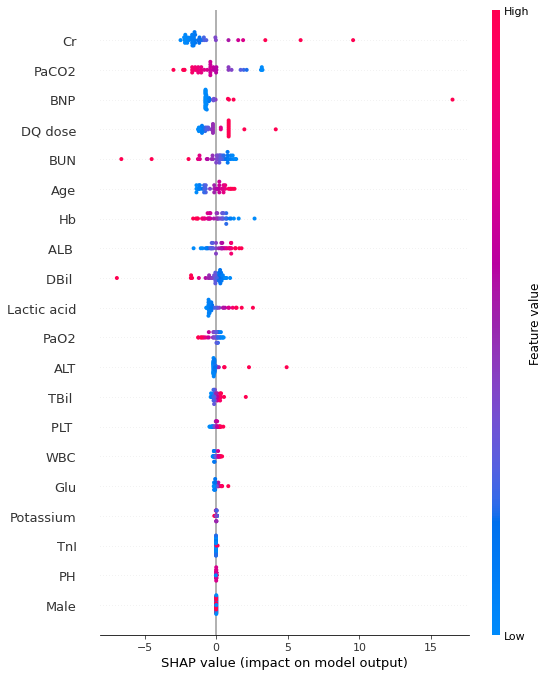

In [5]:
# 计算和绘制逻辑回归模型的SHAP值
explainer_log_reg = shap.Explainer(log_reg, X_train)
shap_values_log_reg = explainer_log_reg(X_test)
shap.summary_plot(shap_values_log_reg, X_test, feature_names=X.columns)

In [6]:
individual_index = 3  
individual_data = X_test.iloc[individual_index:individual_index+1]

shap_values_individual = explainer_log_reg(individual_data)

# 绘制决策图，并保存为PDF文件
shap.plots.waterfall(shap_values_individual[0], show=False)  # 设置show=False来防止立即显示图表
plt.savefig('lr2_shap_waterfall_plot.pdf', bbox_inches='tight')  # 保存为PDF文件
plt.clf()  # 清除当前图形，以便后续绘图不会叠加


<Figure size 576x468 with 0 Axes>

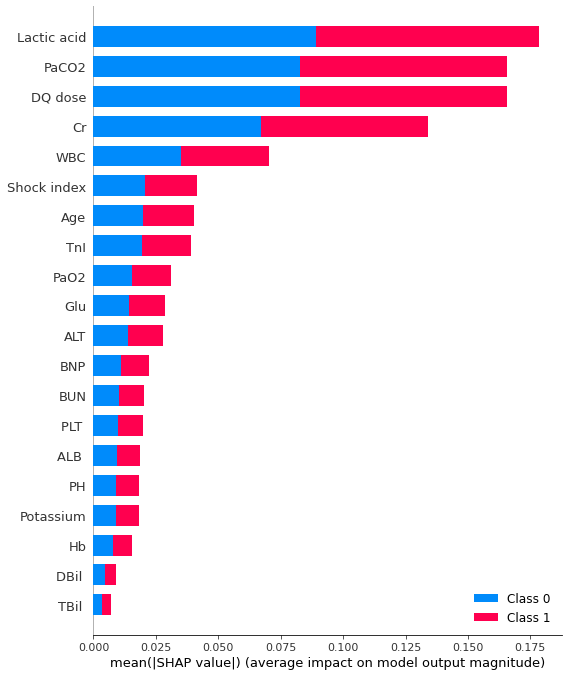

In [7]:
# 创建一个TreeExplainer对象
explainer_rf = shap.TreeExplainer(rf)

# 计算测试集的SHAP值
shap_values_rf = explainer_rf.shap_values(X_test)

# 生成SHAP值的摘要图
shap.summary_plot(shap_values_rf, X_test, feature_names=X.columns)

In [8]:
import matplotlib
print(matplotlib.get_backend())

module://ipykernel.pylab.backend_inline


In [9]:
import matplotlib
matplotlib.use('TKAgg')  # 使用一个特定的后端
import matplotlib.pyplot as plt

Exception in Tkinter callback
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "D:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 804, in callit
    func(*args)
  File "D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x000002D472ECC1F0>
Exception in Tkinter callback
Traceba

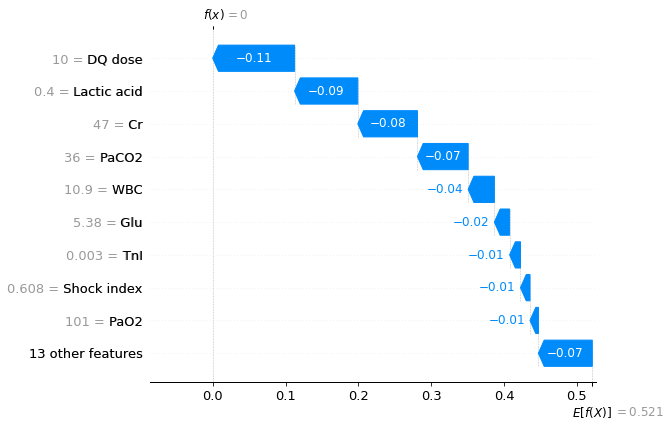

In [10]:
individual_index = 3  # 用于选择特定样本
individual_shap_values = explainer_rf.shap_values(X_test.iloc[individual_index:individual_index+1])

expl = shap.Explanation(values=individual_shap_values[1][0], 
                        base_values=explainer_rf.expected_value[1], 
                        data=X_test.iloc[individual_index], 
                        feature_names=X_test.columns)

# 首先绘制水坛图
shap.plots.waterfall(expl)

# 显示图形
plt.show()

# 然后尝试保存图形到文件
plt.savefig('shap_waterfall_plot_simple.pdf', bbox_inches='tight')

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names


X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid fea

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid fea

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid fea

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid fea

Exception in Tkinter callback
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\_backend_tk.py", line 242, in resize
    self.draw()
  File "D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x000002D473B3E2B0>
Exception in Tkinter callback
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1883, 

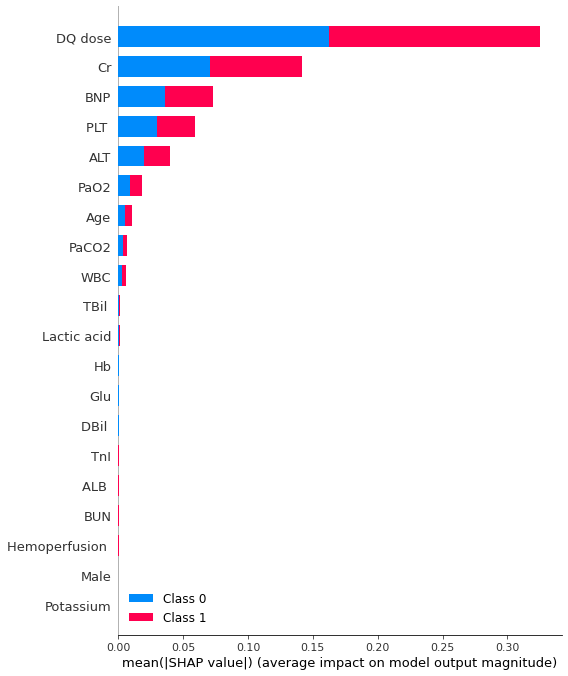

In [11]:
explainer_svm = shap.KernelExplainer(calibrated_svm.predict_proba, shap.sample(X_train, 100))
shap_values_svm = explainer_svm.shap_values(shap.sample(X_test, 50))
shap.summary_plot(shap_values_svm, shap.sample(X_test, 50), feature_names=X.columns)

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names


Exception in Tkinter callback
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "D:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 804, in callit
    func(*args)
  File "D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x000002D472D59250>
Exception in Tkinter callback
Traceba

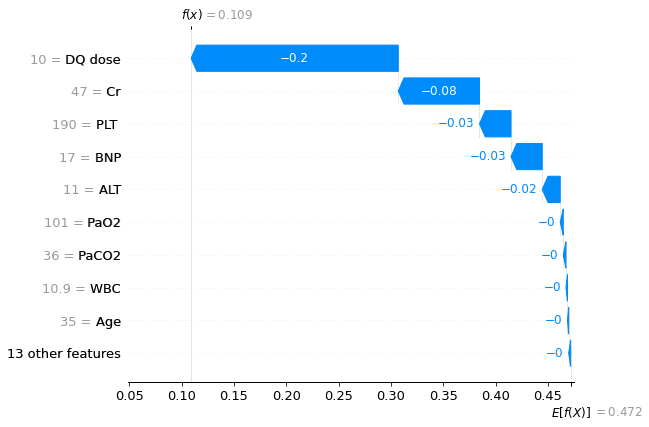

In [12]:
individual_index = 3  
individual_sample = X_test.iloc[individual_index:individual_index+1]

# 计算这个样本的SHAP值
individual_shap_values_svm = explainer_svm.shap_values(individual_sample)

# 绘制水坛图
shap.plots.waterfall(shap.Explanation(values=individual_shap_values_svm[1][0],
                                      base_values=explainer_svm.expected_value[1],
                                      data=individual_sample.values[0],
                                      feature_names=X.columns))
plt.savefig('svm2_shap_waterfall_plot.pdf', bbox_inches='tight')


Exception in Tkinter callback
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\_backend_tk.py", line 242, in resize
    self.draw()
  File "D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x0000024196853B20>
Exception in Tkinter callback
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1883, 

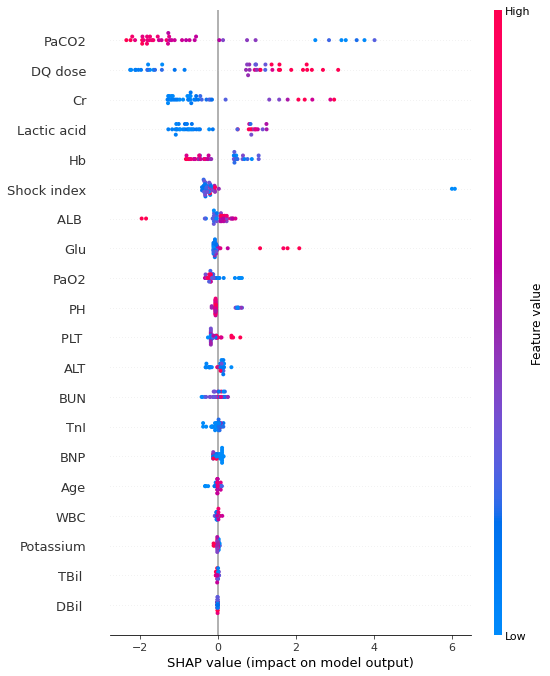

In [14]:
explainer_gb = shap.Explainer(gb, X_train)
shap_values_gb = explainer_gb(X_test)
shap.summary_plot(shap_values_gb, X_test, feature_names=X.columns)

In [15]:
individual_index = 3  
shap_values_individual_gb = shap_values_gb[individual_index]
shap.plots.waterfall(shap_values_individual_gb)
import matplotlib.pyplot as plt
plt.savefig('gb2_individual_shap_waterfall_plot.pdf', bbox_inches='tight')
plt.clf()  

<Figure size 576x468 with 0 Axes>